In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

이번 내용에서는 특정 헬스장과 관련한 총 네개의 데이터를 사용합니다

- `use_log.csv`: 2018.04 부터 2019.03 사이의 헬스장 회원들의 이용 로그 데이터
- `customer_master.csv`: 2019년 3월 말 시점에서의 회원 데이터
- `class_master.csv`: 회원 종류 데이터
- `campaign_master.csv`: 회원권 할인 행사 데이터

위의 데이터들을 불러오도록 하겠습니다.

## 센터의 이용 이력 데이터

In [2]:
# 센터의 이용 이력 데이터 (2018.4 ~ 2019.3)

uselog = pd.read_csv("use_log.csv")
print(uselog.shape)
uselog.head()

(197428, 3)


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


## 2019 3월 말 시점의 회원 데이터

- `start_date`: 회원 등록 날짜
- `end_date`: 회원 탈퇴 날짜 (지속 회원의 경우 결측치)
- `is_deleted`: 회원 탈퇴 여부 (1 = 탈퇴)

In [3]:
# 2019 3월 말 시점의 회원 데이터

customer = pd.read_csv("customer_master.csv")
print(customer.shape)
customer.head()

(4192, 8)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


## 회원 구분 데이터

In [4]:
# 회원 구분 데이터

class_master = pd.read_csv("class_master.csv")
print(class_master.shape)
class_master.head()

(3, 3)


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


## 행사 구분 데이터

In [5]:
# 행사 구분 데이터

campaign_master = pd.read_csv("campaign_master.csv")
print(campaign_master.shape)
campaign_master.head()

(3, 2)


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


# 데이터 결합

- customer 데이터셋을 기준으로 class_master와 campaign_master 데이터를 결합

In [6]:
customer_join = pd.merge(customer, class_master, on="class", how="left")
print(customer.shape)
print(customer_join.shape)

(4192, 8)
(4192, 10)


In [7]:
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
print(customer_join.shape)
customer_join.head()

(4192, 11)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [8]:
# 결측치 확인

customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

- `end_date` 칼럼에 결측치가 존재하는 것을 확인할 수 있습니다. 결측치가 존재한다는 것은 아직 헬스장을 다니는 회원이라는 의미임으로 이상할 것은 없습니다.

# 회원 정보 집계 (EDA)

앞서 조인한 데이터를 바탕으로 회원들에 대한 정보를 파악해봅시다.

In [9]:
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [10]:
# 회원 구분
customer_join.groupby(by="class_name", as_index=False).count().name

0    2045
1    1019
2    1128
Name: name, dtype: int64

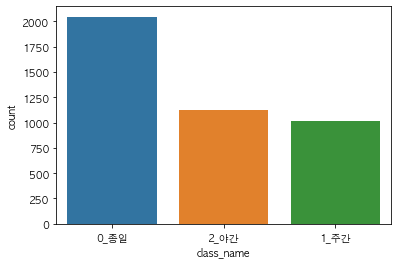

In [11]:
plt.rcParams['font.family'] = 'AppleGothic'   # 한글 깨짐 방지
sns.countplot(x="class_name", data = customer_join)
plt.show()

- 종일 회원이 가장 많습니다

In [12]:
# 캠페인 종류
customer_join.groupby(by="campaign_name").count().name

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: name, dtype: int64

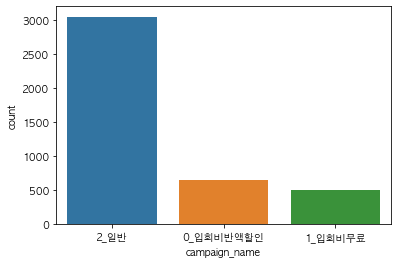

In [13]:
plt.rcParams['font.family'] = 'AppleGothic'   # 한글 깨짐 방지
sns.countplot(x="campaign_name", data = customer_join)
plt.show()

- 일반 가격으로 가입한 회원이 가장 많습니다.

In [14]:
# 성별 
gender = customer_join.groupby("gender").count().name
gender

gender
F    1983
M    2209
Name: name, dtype: int64

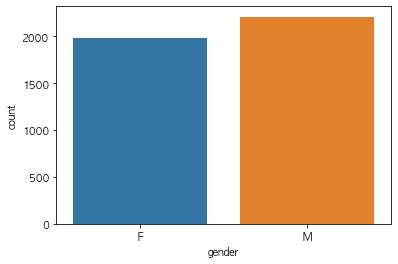

In [15]:
plt.rcParams['font.family'] = 'AppleGothic'   # 한글 깨짐 방지
sns.countplot(x="gender", data = customer_join)
plt.show()

- 남자가 약간 더 많아보입니다.

In [16]:
# 탈퇴여부
customer_join.groupby("is_deleted").count().name

is_deleted
0    2842
1    1350
Name: name, dtype: int64

- 현재 헬스장에 등록된 회원은 약 2800명 정도입니다.

In [17]:
# 2018 4월 이후 가입자 수 집계

# start_date 칼럼 날짜자료형으로 변환
customer_join.start_date = pd.to_datetime(customer_join.start_date)

# 2018년 4월 이후 가입 고객들만 집계
filter1 = customer_join.start_date > pd.to_datetime("2018.04.01")
after_2018_04 = customer_join[filter1]

print(after_2018_04.shape)
after_2018_04.head()

(1361, 11)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
2831,HI195873,XXX,C01,F,2018-04-02,2018-08-31 00:00:00,CA3,1,0_종일,10500,1_입회비무료
2832,TS322485,XX,C03,F,2018-04-02,2018-08-31 00:00:00,CA3,1,2_야간,6000,1_입회비무료
2833,IK552971,XXXXX,C02,F,2018-04-02,2018-08-31 00:00:00,CA3,1,1_주간,7500,1_입회비무료
2834,PL000560,XXX,C01,M,2018-04-02,2018-07-31 00:00:00,CA3,1,0_종일,10500,1_입회비무료
2835,HD218970,XXXXX,C01,F,2018-04-02,2018-11-30 00:00:00,CA3,1,0_종일,10500,1_입회비무료


- 앞서 불러온 센터의 이용 이력 데이터는 2018년 4월부터 기록되었습니다. 
- 따라서 그 이후에 가입한 고객들은 헬스장 이용패턴을 완벽하게 파악할 수 있기 때문에 따로 뽑아내서 분석을 진행하는 것도 흥미로울 것 같습니다.

In [18]:
# 가입자 수 등록연도/성별 집계
customer_new1 = customer_join.copy()
customer_new1["start_year"] = customer_join.start_date.dt.strftime("%Y")  # 등록연도 칼럼 생성

pivot_table_year = pd.pivot_table(data =  customer_new1, index = "start_year", 
                                  columns = "gender", aggfunc = "size", fill_value = 0)

pivot_table_year["Total"] = pivot_table_year["F"] + pivot_table_year["M"]
pivot_table_year

gender,F,M,Total
start_year,,,
2015,227,265,492
2016,382,399,781
2017,584,639,1223
2018,677,790,1467
2019,113,116,229


In [19]:
# 가입자 수 등록월/성별 집계
customer_new2 = customer_join.copy()
customer_new2["start_month"] = customer_join.start_date.dt.strftime("%m")

pivot_table_month = pd.pivot_table(data =  customer_new2, index = "start_month", 
                                   columns = "gender", aggfunc = "size", fill_value = 0)

pivot_table_month["Total"] = pivot_table_month["F"] + pivot_table_month["M"]

pivot_table_month

gender,F,M,Total
start_month,,,
01,172,171,343
02,133,167,300
03,133,153,286
04,176,155,331
05,195,221,416
06,179,227,406
07,184,173,357
08,160,194,354
09,147,202,349


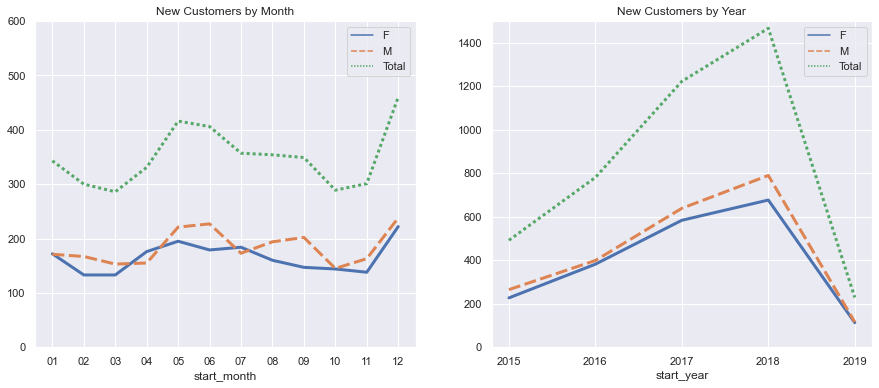

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,600))
sns.lineplot(data = pivot_table_month, linewidth = 3).set_title("New Customers by Month")

plt.subplot(1,2,2)
plt.ylim((0,1500))
sns.lineplot(data = pivot_table_year, linewidth = 3).set_title("New Customers by Year")

plt.show()

- 시도표를 그릴때는 y축의 범위에 항상 신경씁시다!

# 탈퇴한 회원 정보 파악

In [21]:
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반


In [22]:
# end_date 칼럼 자료형 변환
customer_join.end_date = pd.to_datetime(customer_join.end_date)

# 탈퇴한 회원들 집계
filter1 = customer_join.end_date.notnull()
customer_signed_out = customer_join[filter1]

# 탈퇴하지 않은 회원들 집계
filter2 = customer_join.end_date.isnull()
customer_ongoing = customer_join[filter2]

In [23]:
# 회원 종류별 탈퇴율
class_signed_out = customer_signed_out.groupby("class_name").count()["customer_id"]
class_ongoing = customer_ongoing.groupby("class_name").count()["customer_id"]

print(class_signed_out)
print()
print(class_ongoing)
print()
print(class_signed_out / class_signed_out.sum())
print()
print(class_ongoing / class_ongoing.sum())

class_name
0_종일    664
1_주간    344
2_야간    342
Name: customer_id, dtype: int64

class_name
0_종일    1381
1_주간     675
2_야간     786
Name: customer_id, dtype: int64

class_name
0_종일    0.491852
1_주간    0.254815
2_야간    0.253333
Name: customer_id, dtype: float64

class_name
0_종일    0.485925
1_주간    0.237509
2_야간    0.276566
Name: customer_id, dtype: float64


- 그룹 간 비교를 할 떄는 항상 집단간 크기를 고려해줘야 한다는 걸 명심해주세요!
- 상대적 비율로 파악하면 거의 차이가 없는 듯 하네요.

In [24]:
# 성별 별 탈퇴율
gender_signed_out = customer_signed_out.groupby("gender").count()["customer_id"]
gender_ongoing = customer_ongoing.groupby("gender").count()["customer_id"]

print(gender_signed_out)
print()
print(gender_ongoing)
print()
print(gender_signed_out / gender_signed_out.sum())
print()
print(gender_ongoing / gender_ongoing.sum())

gender
F    631
M    719
Name: customer_id, dtype: int64

gender
F    1352
M    1490
Name: customer_id, dtype: int64

gender
F    0.467407
M    0.532593
Name: customer_id, dtype: float64

gender
F    0.475721
M    0.524279
Name: customer_id, dtype: float64


- 성별도 마찬가지로 탈퇴회원과 지속회원 간에 별 차이가 없어보입니다.

In [25]:
# 성별별 탈퇴율을 연도별/월별로 집계

customer_signed_out["signed_out_year"] = customer_signed_out.end_date.dt.strftime("%Y")
customer_signed_out["signed_out_month"] = customer_signed_out.end_date.dt.strftime("%m")

pivot_table_year = pd.pivot_table(data = customer_signed_out, index = "signed_out_year", 
                                   columns = "gender", aggfunc = "size", fill_value = 0)
pivot_table_year["total"] = pivot_table_year["F"] + pivot_table_year["M"]


pivot_table_month = pd.pivot_table(data = customer_signed_out, index = "signed_out_month", 
                                   columns = "gender", aggfunc = "size", fill_value = 0)
pivot_table_month["total"] = pivot_table_month["F"] + pivot_table_month["M"]

<ipython-input-25-4499777e972d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_signed_out["signed_out_year"] = customer_signed_out.end_date.dt.strftime("%Y")
<ipython-input-25-4499777e972d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_signed_out["signed_out_month"] = customer_signed_out.end_date.dt.strftime("%m")


In [26]:
pivot_table_year

gender,F,M,total
signed_out_year,,,
2018,456,505,961
2019,175,214,389


In [27]:
pivot_table_month

gender,F,M,total
signed_out_month,,,
01,53,76,129
02,74,75,149
03,48,63,111
04,60,61,121
05,72,53,125
06,45,61,106
07,45,57,102
08,52,61,113
09,48,56,104


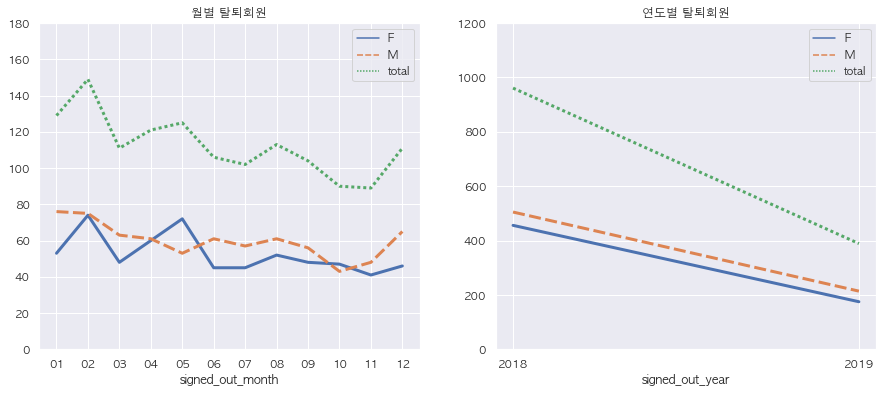

In [28]:
# 시도표 그리기
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15, 6)})
plt.rcParams['font.family'] = 'AppleGothic'   # 한글 깨짐 방지

plt.subplot(1,2,1)
sns.lineplot(data = pivot_table_month, linewidth = 3).set_title("월별 탈퇴회원")
plt.ylim(0,180)

plt.subplot(1,2,2)
sns.lineplot(data = pivot_table_year, linewidth = 3).set_title("연도별 탈퇴회원")
plt.ylim(0,1200)

plt.show()

- 월별 증가 추세를 기준으로 연말에 탈퇴하는 회원수가 늘어나는 것처럼 보입니다.
- 탈퇴회원은 전년도에 비해 2019년도에 준 것처럼 보일 수 있으나, 2019년도 4월까지의 데이터밖에 집계되지 않았다는 것을 조심하세요.

# 회원 이용 이력 데이터 분석

주어진 이용로그 데이터를 분석해봅시다

In [29]:
# usedate 칼럼 자료형 변환
uselog.usedate = pd.to_datetime(uselog.usedate)

# 이용이력에 대한 연월 칼럼 생성
uselog["year_month"] = uselog.usedate.dt.strftime("%Y%m")

In [30]:
uselog.head()

,log_id,customer_id,usedate,year_month
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


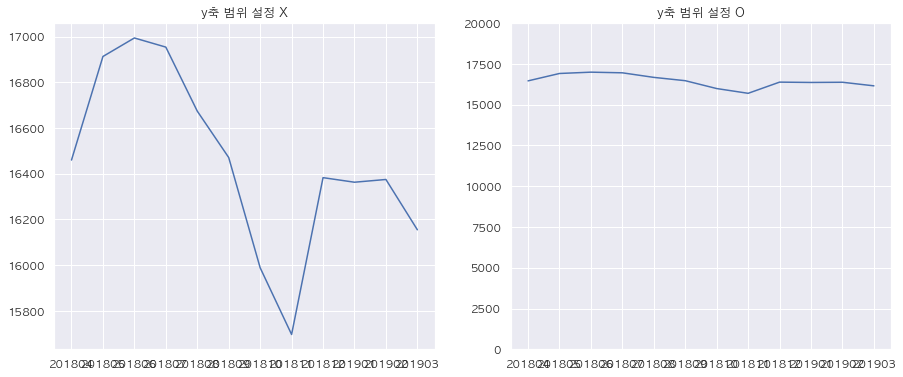

In [31]:
# 월별 사용자수에 대한 시도표
plt.rcParams['font.family'] = 'AppleGothic'   # 한글 깨짐 방지

# y축 범위를 설정하지 않을 경우
plt.subplot(1,2,1)
sns.lineplot(data = uselog.groupby("year_month").count()["log_id"]).set_title("y축 범위 설정 X")

# y축 범위를 설정했을 경우
plt.subplot(1,2,2)
sns.lineplot(data = uselog.groupby("year_month").count()["log_id"]).set_title("y축 범위 설정 O")
plt.ylim(0,20000)

plt.show()

- 왼쪽의 그래프를 보면 월별 헬스장 이용자수가 꽤나 큰 폭으로 변화하는 것처럼 보이지만, y축의 하방을 0으로 고정시켜 놓고 그래프를 그리면 거의 변화가 없이 일정한 것을 확인할 수 있습니다. 
- "이용자수"라는 변수는 0 이상의 정수값을 갖기 때문에 y축의 하방을 0으로 설정하는 것이 타당할 것 같네요.
- 단순히 y축의 범위를 제대로 설정하지 않는 것만으로도 정보에 대한 왜곡이 발생할 수 있다는 점을 꼭 명심해주세요!

In [32]:
# 월별 회원들의 이용횟수
uselog_bymonth = uselog.groupby(["year_month", "customer_id"], as_index=False).count()
uselog_bymonth.rename(columns={"log_id": "count"}, inplace = True)
uselog_bymonth.drop("usedate", axis = 1, inplace = True)
uselog_bymonth

,year_month,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [33]:
# 고객들의 월별 이용횟수에 대한 기초통계량 파악
uselog_bycustomer = uselog_bymonth.groupby("customer_id").agg(["mean", "median", "max", "min"])["count"]
uselog_bycustomer

,mean,median,max,min
customer_id,,,,
AS002855,4.500000,5.0,7,2
AS008805,4.000000,4.0,8,1
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,7,3
AS015233,7.545455,7.0,11,4
...,...,...,...,...
TS995853,9.500000,9.5,11,8
TS998593,8.142857,8.0,9,7
TS999079,4.916667,5.5,9,2


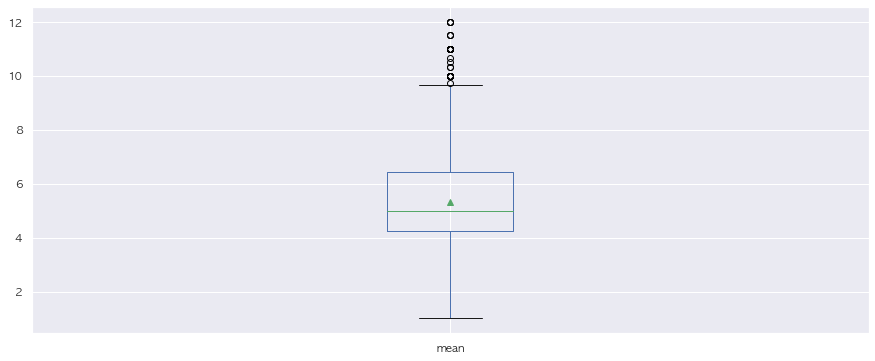

In [34]:
# 고객들의 월별 평균 이용횟수에 대한 박스플롯
uselog_bycustomer["mean"].plot(kind="box", showmeans = True)

In [35]:
# weekday(요일) column 생성
uselog["weekday"] = uselog["usedate"].dt.weekday # Monday:0  //  Sunday:6

def weekday_to_str(weekday):
    dict1 = {
        0: "Mon",
        1: "Tue",
        2: "Wed",
        3: "Thu",
        4: "Fri",
        5: "Sat",
        6: "Sun"
    }
    return dict1[weekday]

uselog.weekday = uselog.weekday.map(weekday_to_str)

uselog

,log_id,customer_id,usedate,year_month,weekday
0,L00000049012330,AS009373,2018-04-01,201804,Sun
1,L00000049012331,AS015315,2018-04-01,201804,Sun
2,L00000049012332,AS040841,2018-04-01,201804,Sun
3,L00000049012333,AS046594,2018-04-01,201804,Sun
4,L00000049012334,AS073285,2018-04-01,201804,Sun
...,...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903,Sun
197424,L00000049209754,TS979550,2019-03-31,201903,Sun
197425,L00000049209755,TS995299,2019-03-31,201903,Sun
197426,L00000049209756,TS995853,2019-03-31,201903,Sun


In [36]:
# 고객별 월/요일별 이용횟수 집계
uselog_weekday = uselog.groupby(["customer_id", "year_month", "weekday"], 
                                as_index = False).count()[["customer_id", "year_month", "weekday", "log_id"]]
uselog_weekday.rename(columns = {"log_id": "count"}, inplace = True)
uselog_weekday

,customer_id,year_month,weekday,count
0,AS002855,201804,Sat,4
1,AS002855,201805,Sat,4
2,AS002855,201805,Wed,1
3,AS002855,201806,Sat,5
4,AS002855,201807,Sat,4
...,...,...,...,...
93328,TS999855,201901,Sat,4
93329,TS999855,201901,Sun,1
93330,TS999855,201901,Tue,1
93331,TS999855,201902,Sat,4


In [37]:
uselog_weekday = uselog_weekday.groupby("customer_id", as_index=False).max()

# 한달에 특정 요일에 모두 방문한 회원 필터링
routine_filter = uselog_weekday["count"] >= 4

# routine_fig column 생성
uselog_weekday["routine_flg"] = 1

# 특정 요일에 모두 방문한 회원에 대해 1로 플래그 지정
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(routine_filter, 0)

uselog_weekday = uselog_weekday[["customer_id", "count", "routine_flg"]]

In [38]:
uselog_weekday

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


# 데이터 결합

앞서 정의한 customer_join 데이터프레임에다 uselog_bycustomer, uselog_weekday 데이터프레임을 결합해줍시다.

In [39]:
# 앞서 정의한 customer_join에 방문횟수에 대한 정보를 추가

customer_join = pd.merge(customer_join, uselog_bycustomer, 
                         on = "customer_id", how = "left")      # 기초통계량에 대한 칼럼들이 추가됨
customer_join = pd.merge(customer_join, uselog_weekday, 
                         on = "customer_id", how = "left")      # routine_flg 칼럼이 추가됨
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,count,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,4,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,5,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,5,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,5,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,5,1


In [40]:
## 회원 기간을 계산

# 회원 기간을 계산하기 위해 칼럼 하나 생성
customer_join["calc_date"] = customer_join.end_date.fillna(pd.to_datetime("2019-04-30"))

# 회원 기간 (월 단위) 기록할 칼럼 생성
customer_join["membership_months"] = 0

# 등록 기간부터 종료시점까지 몇개월 동안 회원이었는지를 계산
from dateutil.relativedelta import relativedelta
for i in range(len(customer_join)):
    delta = relativedelta(customer_join.calc_date[i], customer_join.start_date[i]) # delta 오브젝트 생성
    customer_join["membership_months"].iloc[i] = delta.years * 12 + delta.months   # 개월 수 계산해서 추가
    
customer_join.drop(["name", "calc_date"], axis=1, inplace=True)  # 필요없는 칼럼 삭제

customer_join.head()

/Users/dongwook/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,customer_id,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,count,routine_flg,membership_months
0,OA832399,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,4,1,47
1,PL270116,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,5,1,47
2,OA974876,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,5,1,47
3,HD024127,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,5,1,47
4,HD661448,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,5,1,47


- 주어진 데이터들에 대해 전처리가 완료된 깔끔한 데이터를 얻었습니다. 
- 이를 추후에 다시 사용하기 위해 csv 파일로 저장해둡시다.

In [41]:
customer_join.to_csv("customer_join.csv", index=False)

# 추가 EDA

앞선 과정으로 구한 통합된 데이터프레임에 대해 간단하게 EDA를 진행해봅시다!

In [42]:
print(customer_join.shape)
customer_join.head()

(4192, 17)


,customer_id,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,count,routine_flg,membership_months
0,OA832399,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,4,1,47
1,PL270116,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,5,1,47
2,OA974876,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,5,1,47
3,HD024127,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,5,1,47
4,HD661448,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,5,1,47


In [43]:
# 한달 간 방문 횟수에 대한 기초 통계량 파악

customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


routine_flg
0     779
1    3413
Name: customer_id, dtype: int64


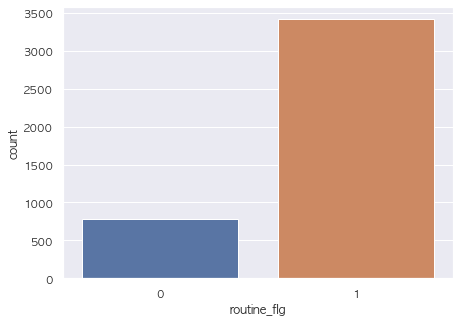

In [44]:
# 꾸준히 다니는 회원의 비율
print(customer_join.groupby("routine_flg").count()["customer_id"])

sns.set(rc={'figure.figsize':(7, 5)})
plt.rcParams['font.family'] = 'AppleGothic'   # 한글 깨짐 방지

sns.countplot(x="routine_flg", data = customer_join)
plt.show()

- 정기적으로 헬스장을 이용하는 회원의 비율이 훨씬 높은 것을 확인할 수 있습니다.

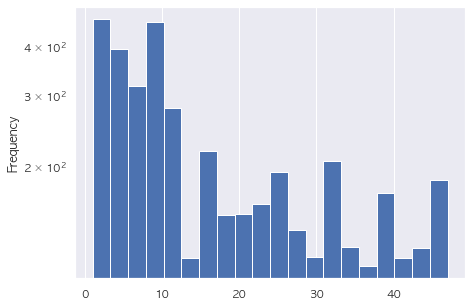

In [45]:
# 회원기간의 로그 히스토그램
customer_join.membership_months.plot(kind="hist", bins=20) # 일반적으로 10개월 이내 --> 단기 이탈 고객이 많다!
plt.yscale("log", nonposy="clip")

- 일반적으로 회원기간이 10개월 이내인 회원들이 많으며, 특히 첫 2~3개월 만에 탈퇴하는 회원의 수가 가장 높습니다.
- 이는 단기 이탈 고객이 많다는 의미로, 이에 대한 조치가 필요해보이네요.


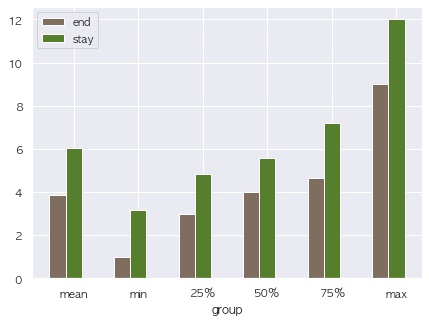

In [46]:
# 탈퇴회원 vs 지속회원 간 평균 월별 이용횟수 비교
customer_end = customer_join[customer_join.is_deleted == 1]
customer_stay = customer_join[customer_join.is_deleted == 0]

# set width of bar
barWidth = 0.25

# set height of bar
bars_end = customer_end.describe()["mean"][["mean", "min", "25%", "50%", "75%", "max"]]
bars_stay = customer_stay.describe()["mean"][["mean", "min", "25%", "50%", "75%", "max"]]

# Set position of bar on X axis
r1 = np.arange(len(bars_end))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars_end, color='#7f6d5f', width=barWidth, edgecolor='white', label='end')
plt.bar(r2, bars_stay, color='#557f2d', width=barWidth, edgecolor='white', label='stay')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars_end))], ["mean", "min", "25%", "50%", "75%", "max"])

# Create legend & Show graphic
plt.legend()
plt.show()

- 지속회원들이 탈퇴회원들에 비해 월 평균 이용횟수가 유의미하게 많은 것을 확인할 수 있습니다.
- 탈퇴회원들 중에서는 헬스장에 방문하기가 귀찮았던 회원들이 많은 것 같네요.

In [47]:
# 여태까지 총 수익
sum(customer_join.price * customer_join.membership_months)

677401500